In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data Set

In [2]:
Raw_df1 = pd.read_csv('train.csv')
Raw_df2 = pd.read_csv('test.csv')

In [3]:
Raw_df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Raw_df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(Raw_df1.shape)
Raw_df2.shape

(891, 12)


(418, 11)

In [6]:
Raw_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_length = len(Raw_df1)
train_length

891

# Visual Analyzation to Observe Outliers & High Dimentionality Problems

In [8]:
import seaborn as sns

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

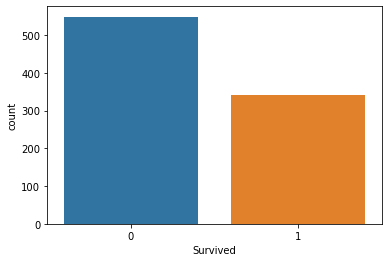

In [9]:
sns.countplot(Raw_df1.Survived)

It is telling us the people survived are less in number than the ones who lost their lives

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

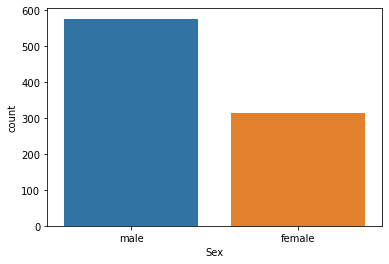

In [10]:
#Checking which the frequency of male and female in data
sns.countplot(Raw_df1.Sex)

There were three classes on Titanic lets see which one has more people 

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

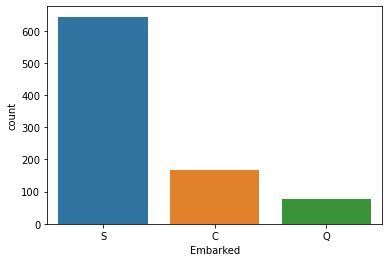

In [11]:
sns.countplot(Raw_df1.Embarked)

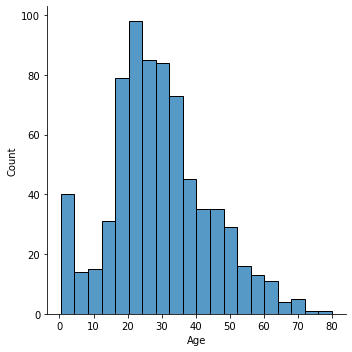

In [12]:
# Checking type of distribution
sns.displot(Raw_df1.Age)

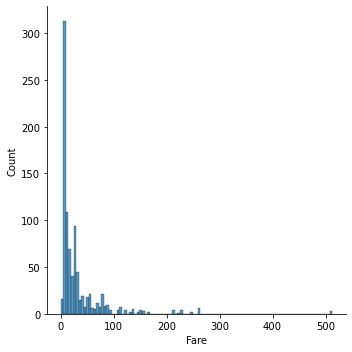

In [13]:
sns.displot(Raw_df1.Fare)

We can see some outliers in the Fare column we have to remove them because they have little to no effect on distribution

In [14]:
Raw_df1.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

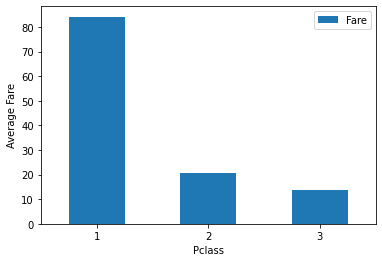

In [15]:
#Lets observe the above code in form of Graph
graph = Raw_df1.pivot_table('Fare', 'Pclass')
graph.plot(kind = 'bar')
plt.xticks(rotation = 360)
plt.ylabel('Average Fare')
plt.show()

In [16]:
Raw_df1.groupby('Pclass')['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

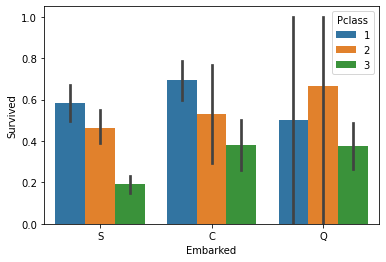

In [17]:
sns.barplot(data=Raw_df1, x='Embarked', y='Survived', hue='Pclass')

# Data Pre-processing

In [18]:
#Now we will concatinate both data sets (Testing) & (Training)
raw_df = pd.concat([Raw_df1,Raw_df2], axis = 0)

In [19]:
raw_df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
#checking null values in columns
raw_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
#cabin names and passenger id are not very useful. We will drop it
raw_df1 =raw_df.drop(['Cabin', 'PassengerId'], axis = 1)

In [22]:
#now we will fill the null values with the mean & mode depending upon data
raw_df1['Age'] =raw_df1['Age'].fillna(raw_df1.Age.mean())

In [23]:
# All null values are filled
raw_df1.Age.isnull().sum()

0

In [24]:
raw_df1['Fare'] = raw_df1['Fare'].fillna(raw_df1.Fare.mean())

In [25]:
raw_df1['Embarked'] =raw_df1['Embarked'].fillna(raw_df1.Embarked.mode()[0])

In [26]:
raw_df1.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [27]:
raw_df1['Survived'] = raw_df1.Survived.dropna()

In [28]:
raw_df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [29]:
raw_df1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# Working with Distribution of Fare Column

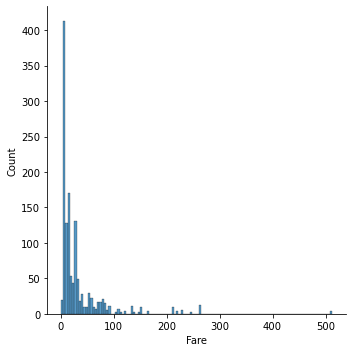

In [30]:
sns.displot(raw_df1.Fare)

In [31]:
raw_df1['Fare'] = np.log(raw_df1.Fare+1)

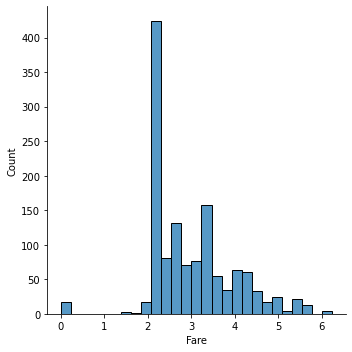

In [32]:
sns.displot(raw_df1.Fare)

Now distribution has changed

# Checking Relationship between Features

<AxesSubplot:>

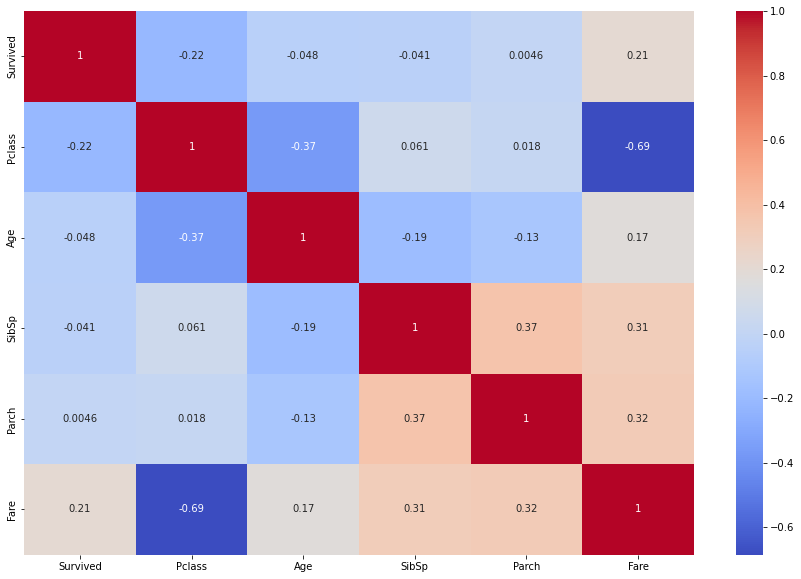

In [33]:
# Using correlation matrix to see useful columns and their relationship between them based on the heatmap
correlation_matrix = raw_df1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [34]:
raw_df1.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S


In [35]:
# dropping useless columns
raw_df2 = raw_df1.drop(['Name', 'Ticket'], axis = 1)

In [36]:
print(raw_df2.Sex.unique())
print(raw_df2.Embarked.unique())

['male' 'female']
['S' 'C' 'Q']


In [37]:
raw_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,2.110213,S
1,1.0,1,female,38.0,1,0,4.280593,C
2,1.0,3,female,26.0,0,0,2.188856,S
3,1.0,1,female,35.0,1,0,3.990834,S
4,0.0,3,male,35.0,0,0,2.202765,S


As we know machine learning algorithms do no work with strings. We will have to convert Embarked and Sex column into numbers using pre-processing libraries

In [38]:
from sklearn.preprocessing import LabelEncoder
columns = ['Sex', 'Embarked']
encoder = LabelEncoder()
for i in columns:
    raw_df2[i] = encoder.fit_transform(raw_df2[i]) 

In [39]:
raw_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


In [40]:
print(raw_df2.Sex.unique())
print(raw_df2.Embarked.unique())

[1 0]
[2 0 1]


# Train Test Split

In [41]:
train_set = raw_df2.iloc[:train_length, :]
test_set = raw_df2.iloc[train_length:, :]

In [42]:
X = train_set.drop('Survived', axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [43]:
y = train_set['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Supervised Machine Learning Approach

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.800561797752809

In [46]:
Max_Score = cross_val_score(model, X, y, cv=15)
Max_Score[np.argmax(Max_Score)]

0.847457627118644

In [47]:
! pip install lightgbm

In [48]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9466292134831461

In [49]:
model.fit(X_test,y_test)
model.score(X_test,y_test)

0.9217877094972067

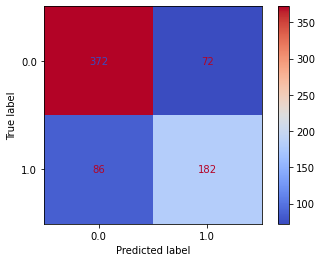

In [50]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(model, X_train, y_train, cmap='coolwarm')
plt.show()

# Unsupervised Machine Learning Approach

In [51]:
from sklearn.cluster import KMeans

In [52]:
model = KMeans(n_clusters= 2, max_iter= 300, algorithm='auto', random_state=1)
model.fit(X)

KMeans(n_clusters=2, random_state=1)

In [53]:
y_pred = model.predict(X)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mse = mean_squared_error(y,y_pred)

In [56]:
np.sqrt(mse)

0.664136613263748

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8412921348314607

In [58]:
from sklearn.metrics import plot_confusion_matrix

In [59]:
y_predicted = model.predict(X_train)

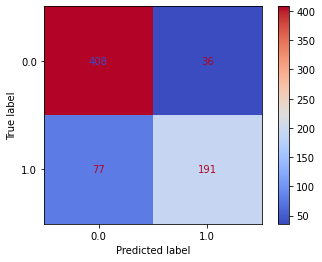

In [60]:
matrix = plot_confusion_matrix(model, X_train, y_train, cmap='coolwarm')
plt.show()